#Adaptado por Bruno Menezes (https://github.com/brunoleomenezes) e será utilizado apenas para fins acadêmicos.

## Convolução 1D

---

Vamos assumir o seguinte problema:<br>
Faz-se necessário coletar dados do acelerômetro de um celular. O objetivo é fazer com que pessoas caminhem com o celular no bolso para analisar como o sensor responde a esse movimento. A magnitude no sinal do acelerômetro se altera como uma espécie de **senóide ruidosa**.

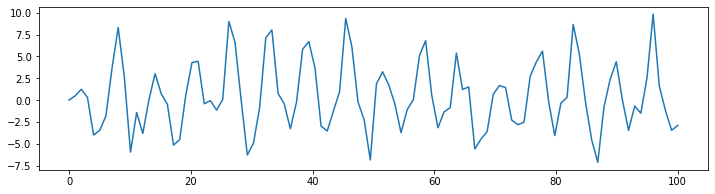

In [33]:
#Simular senóide ruidosa
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve

#Eixo x intervalo de valores entre 0 e 100
x = np.linspace(0, 100, 100)
sin = 10 * np.sin(x) * np.random.rand(x.shape[0]) #sin = y

plt.figure(figsize=(12, 3))
plt.plot(x, sin)

In [34]:
#Cada ponto da imagem equivale a um ponto do sinal
def show(valores, title,):
  plt.figure(figsize=(len(valores), 2))
  plt.imshow(valores[np.newaxis, :], cmap='gray')
  for k, s in enumerate(valores):
    plt.text(k, 0, '{:.1f}'.format(s), fontsize=16, color='red', ha='center', va='center')
  plt.title(title, fontsize=18)
  plt.yticks([])

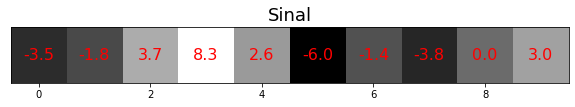

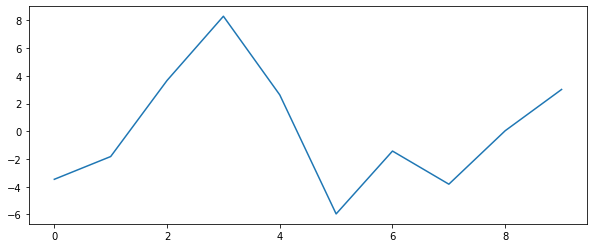

In [35]:
sinal = sin[5:15]
show(sinal, 'Sinal')

plt.figure(figsize=(10, 4))
plt.plot(sinal)

#Ideal é que o nosso código identifique os intervalos como crescentes ou não

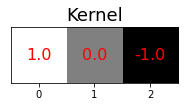

In [36]:
# Filtro precisa ter o padrão que desejamos encontrar, ou seja, intervalo crescente = kernel crescente
kernel = np.asarray([1,0,-1])
show(kernel, 'Kernel')

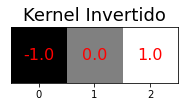

In [37]:
#kernel invertido
kernel_invertido = np.flip(kernel)
show(kernel_invertido, 'Kernel Invertido')

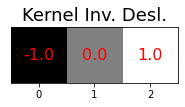

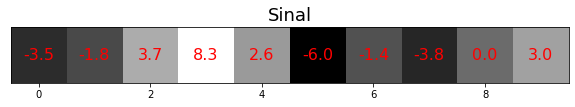

In [38]:
plt.close('all')

#Alterar o valor de u 
#Desloca o kernel
u=0
deslocamento = [float('nan')] * u
kernel_deslocado = np.hstack( (deslocamento, kernel_invertido) )

show(kernel_deslocado, 'Kernel Inv. Desl.')
show(sinal, 'Sinal')

In [39]:
(-3.5 * -1.0) + (0.0 * -1.8) + (1.0 * 3.7)

7.2

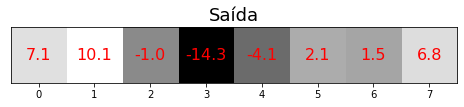

In [40]:
out = convolve(sinal, kernel, mode='valid')
show(out, 'Saída')

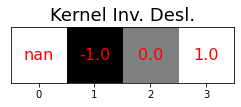

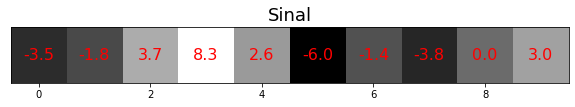

In [41]:
plt.close('all')

#Alterar o valor de u 
#Desloca o kernel
u=1
deslocamento = [float('nan')] * u
kernel_deslocado = np.hstack( (deslocamento, kernel_invertido) )

show(kernel_deslocado, 'Kernel Inv. Desl.')
show(sinal, 'Sinal')

In [42]:
(-1.0 * -1.8) + (0.0 * 3.7) + (1.0 * 8.3)

10.100000000000001

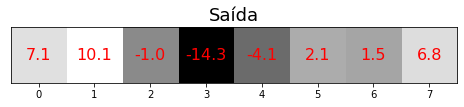

In [43]:
out = convolve(sinal, kernel, mode='valid')
show(out, 'Saída')
#10.1 é nosso pico de ativação

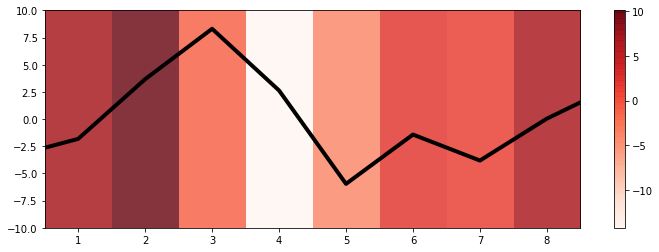

In [44]:
#Mapa de ativação do sinal acima como ativação
plt.figure(figsize=(12, 4))
plt.plot(sinal, color='k', linewidth=4)
plt.imshow(out[np.newaxis, :], cmap='Reds', aspect='auto', alpha=0.8, extent=(0.5, 8.5, -10, 10))
plt.colorbar()

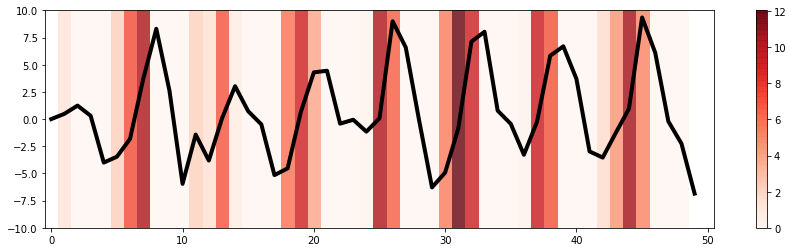

In [45]:
#Mapa de ativação completo do sinal acima como ativação

out = convolve(sin[:50], kernel, mode='valid')
out[out < 0] = 0

plt.figure(figsize=(15, 4))
plt.plot(sin[:50], color='k', linewidth=4)
plt.imshow(out[np.newaxis, :], cmap='Reds', aspect='auto', alpha=0.8, extent=(0.5, 48.5, -10, 10))
plt.xlim(-0.5, 50.5)
plt.colorbar()